<a href="https://colab.research.google.com/github/RafaelSperanca/Canadian-Cheese/blob/main/cheese_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In[1]: Importando Biblioteca


In [1]:
!pip install numpy > /dev/null 2>&1
!pip install tensorflow > /dev/null 2>&1
!pip install scikit-learn > /dev/null 2>&1
!pip install pmdarim > /dev/null 2>&1
!pip install scipy > /dev/null 2>&1
!pip install statsmodels > /dev/null 2>&1
!pip install matplotlib seaborn pandas > /dev/null 2>&1
!pip install keras-tuner > /dev/null 2>&1
!pip install scikeras > /dev/null 2>&1
!pip install pandas openpyxl > /dev/null 2>&1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Informações das Colunas

**CheeseId**: Identificador único atribuído a cada tipo de queijo no dataset.

**Manufacturer/ProvCode**: Código da província canadense onde o queijo foi produzido, como NB (New Brunswick), ON (Ontario) e BC (British Columbia).

**ManufacturingTypeEn**: Tipo de produção do queijo, como Farmstead (artesanal na própria fazenda), Industrial e Artisan (artesanal).

**MoisturePercent**: Percentual de umidade no queijo, indicando a quantidade de água presente.

**FlavourEn**: Descrição dos sabores do queijo, como "Sharp, lactic" (ácido, lácteo) ou "Mild, tangy, and fruity" (suave, picante e frutado).

**CharacteristicsEn**: Características do queijo, como "Uncooked" (não cozido) ou "Pressed and cooked cheese" (queijo prensado e cozido).

**Organic**: Indicador de produção orgânica, onde 0 representa não orgânico e 1 representa orgânico.

**CategoryTypeEn**: Categoria do queijo, como "Firm Cheese" (queijo firme) e "Semi-soft Cheese" (queijo semimole).

**MilkTypeEn**: Tipo de leite usado na produção, como "Ewe" (ovelha), "Cow" (vaca) e misturas como "Cow and Goat" (vaca e cabra).

**MilkTreatmentTypeEn**: Tratamento do leite, como "Raw Milk" (leite cru), "Pasteurized" (pasteurizado) ou "Thermised" (termizado).

**RindTypeEn**: Tipo de casca do queijo, como "Washed Rind" (casca lavada), "Bloomy Rind" (casca florida) ou "No Rind" (sem casca).

**CheeseName**: Nome comercial do queijo, como "Sieur de Duplessis (Le)" ou "Provolone Sette Fette (Tre-Stelle)".

**FatLevel**: Nível de gordura do queijo, como "lower fat" (baixo teor de gordura) ou "higher fat" (alto teor de gordura).

### In[2]: Importando arquivos para análise


In [3]:
cheese = pd.read_csv('/content/cheese_data.csv')

print(cheese.head())

   CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
0       228                   NB           Farmstead             47.0   
1       242                   NB           Farmstead             47.9   
2       301                   ON          Industrial             54.0   
3       303                   NB           Farmstead             47.0   
4       319                   NB           Farmstead             49.4   

                                          FlavourEn  \
0                                     Sharp, lactic   
1                Sharp, lactic, lightly caramelized   
2                           Mild, tangy, and fruity   
3  Sharp with fruity notes and a hint of wild honey   
4                                      Softer taste   

                                   CharacteristicsEn  Organic  \
0                                           Uncooked        0   
1                                           Uncooked        0   
2  Pressed and cooked cheese, pasta

### In[3]: Identificando formato das tabelas


In [4]:
cheese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


### In[4]: Identificando valores missing e ordenando do maior para o menor.


In [5]:

print(cheese.isnull().sum().sort_values(ascending=False))


CharacteristicsEn       399
RindTypeEn              321
FlavourEn               241
MilkTreatmentTypeEn      65
CategoryTypeEn           23
MoisturePercent          14
MilkTypeEn                1
CheeseId                  0
ManufacturingTypeEn       0
ManufacturerProvCode      0
Organic                   0
CheeseName                0
FatLevel                  0
dtype: int64


### In[5]: Os dados revelam a distribuição percentual de valores ausentes na característica do queijo por província:


In [9]:
char = cheese[cheese['CharacteristicsEn'].isnull()]['ManufacturerProvCode'].value_counts(normalize=True) * 100
charprop = char.round(2)
chardf = char.reset_index()
chardf.columns = ['ManufacturerProvCode', 'proportion']


print(charprop)

ManufacturerProvCode
QC    69.17
ON    14.54
BC     8.77
NB     2.26
MB     2.01
NS     1.50
AB     1.00
PE     0.25
NL     0.25
SK     0.25
Name: proportion, dtype: float64


### In[6]: Gráfico da tabela anterior

/tmp/ipython-input-1315985750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chardf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')


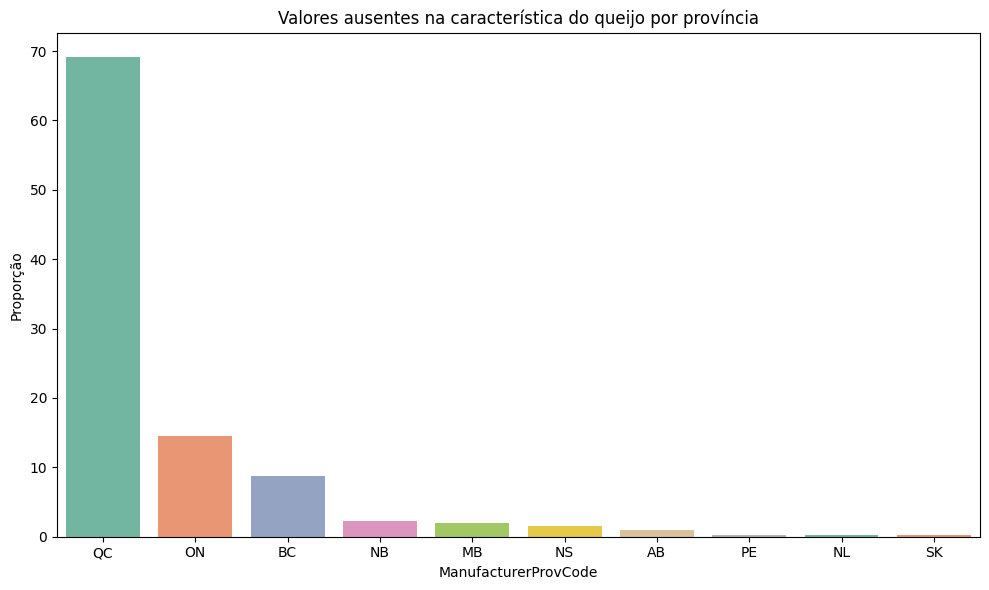

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=chardf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')
plt.title('Valores ausentes na característica do queijo por província')
plt.xlabel('ManufacturerProvCode')
plt.ylabel('Proporção')
#plt.ylim(0, 1) # Limita o eixo Y de 0 a 1 (porque é proporção)
plt.tight_layout()
plt.show()

### In[7]: Os dados de distribuição percentual de valores ausentes por tipo de casca do queijo e por província:


In [11]:
rind = cheese[cheese['RindTypeEn'].isnull()]['ManufacturerProvCode'].value_counts(normalize=True) * 100
rindprop = rind.round(2)
rinddf = rind.reset_index()
rinddf.columns = ['ManufacturerProvCode', 'proportion']

print(rindprop)


ManufacturerProvCode
QC    54.21
ON    23.36
BC    14.02
NB     3.12
AB     1.87
NS     1.87
MB     0.93
PE     0.31
SK     0.31
Name: proportion, dtype: float64


### In[7]: Gráfico da tabela anterior

/tmp/ipython-input-1904808466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rinddf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')


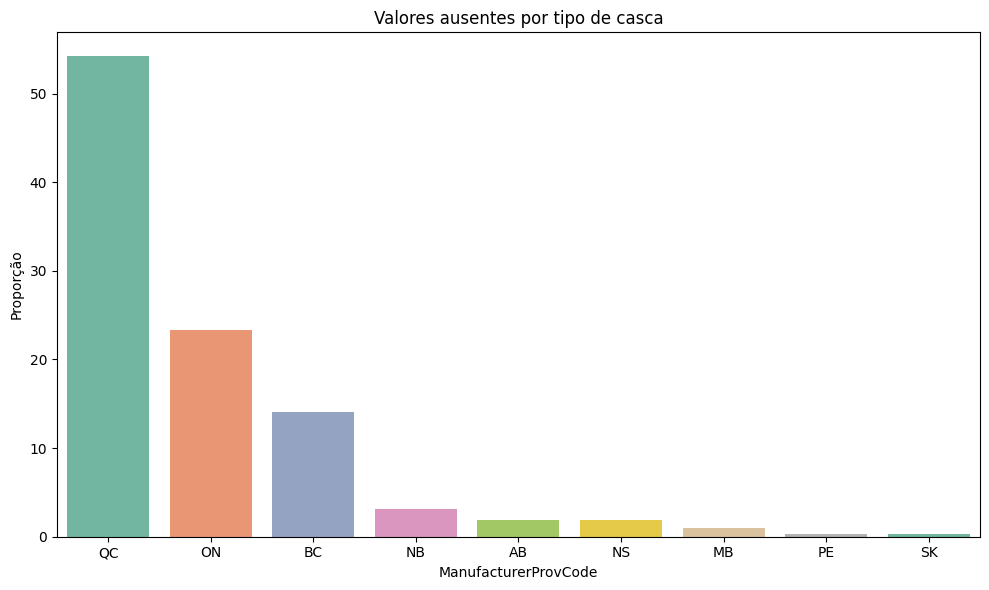

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rinddf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')
plt.title('Valores ausentes por tipo de casca')
plt.xlabel('ManufacturerProvCode')
plt.ylabel('Proporção')
#plt.ylim(0, 1) # Limita o eixo Y de 0 a 1 (porque é proporção)
plt.tight_layout()
plt.show()

# In[6]: Distribuição de valores ausentes por sabores do queijo.


In [13]:
fla = cheese[cheese['FlavourEn'].isnull()]['ManufacturerProvCode'].value_counts(normalize=True) * 100
flaprop = fla.round(2)
fladf = flaprop.reset_index()
fladf.columns = ['ManufacturerProvCode', 'proportion']

print(flaprop)

ManufacturerProvCode
QC    62.24
ON    19.50
BC    11.20
NB     1.66
AB     1.66
MB     1.66
NS     1.24
NL     0.83
Name: proportion, dtype: float64


### In[7]: Gráfico de distribuição de valores ausentes por sabores do queijo


/tmp/ipython-input-3680741589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fladf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')


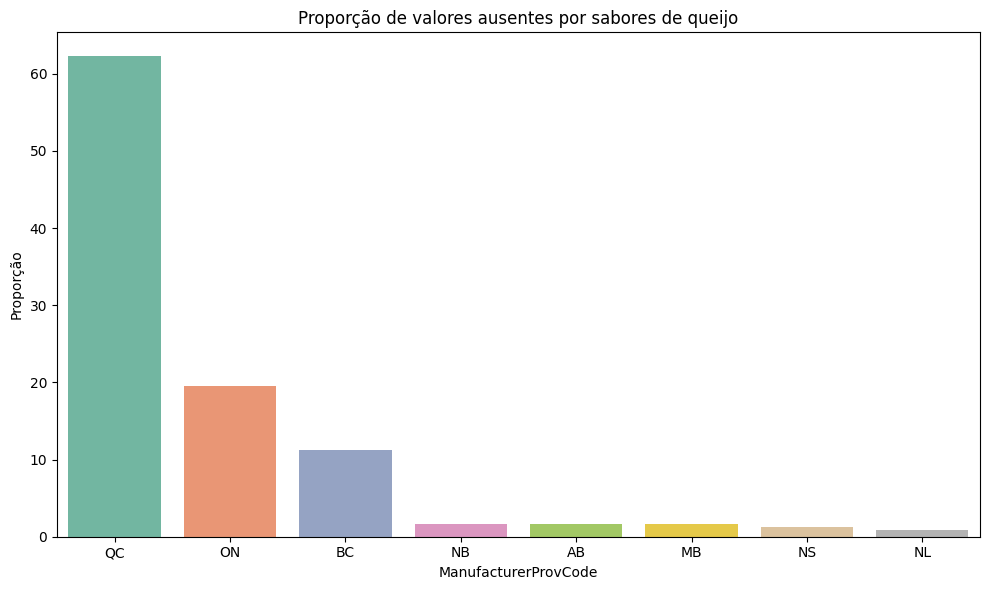

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fladf, x='ManufacturerProvCode', y= 'proportion', palette='Set2')
plt.title('Proporção de valores ausentes por sabores de queijo')
plt.xlabel('ManufacturerProvCode')
plt.ylabel('Proporção')
#plt.ylim(0, 1) # Limita o eixo Y de 0 a 1 (porque é proporção)
plt.tight_layout()
plt.show()

### In[8]: Tabela cruzada para identificar se os queijos orgânicos tem uma maior indice de gordura em valores absolutos.

In [15]:
tabela1 = pd.crosstab(cheese['Organic'], cheese['FatLevel'])
tabela1

FatLevel,higher fat,lower fat
Organic,,
0,312,631
1,46,53


### In[9]: Tabela cruzada anterior em termos percentuais. Percebe-se que queijo não orgânicos (60,56%) tem um baixo nível de gordura contra 5,09% dos queijor orgânicos.


In [16]:
tabela = pd.crosstab(cheese['Organic'], cheese['FatLevel'], normalize='all')
tabela = tabela.round(4) * 100
tabela

FatLevel,higher fat,lower fat
Organic,,
0,29.94,60.56
1,4.41,5.09


### In[10]: Verifcando a relação entre o teor de gordura e a umidade do queijo. Para isso, foi feita a média da umidade para queijos de baixa gordura (lower fat) vs a de alta (higher fat). Observa-se que queijos com alto índice de gordura têm baixa umidade, na média, em comparação ao de baixa gordura.

In [17]:
media = cheese.groupby('FatLevel')['MoisturePercent'].mean().reset_index()
media = media.round(2)
media

,FatLevel,MoisturePercent
0,higher fat,40.54
1,lower fat,50.53


### In[10]: Distribuição da Umidade por Nível de Gordura. O gráfico de dispersão confirma a relação inversa entre gordura e umidade:
- Queijos com baixa gordura tendem a ter maior umidade.
- Queijos com alta gordura tendem a ter menor umidade.

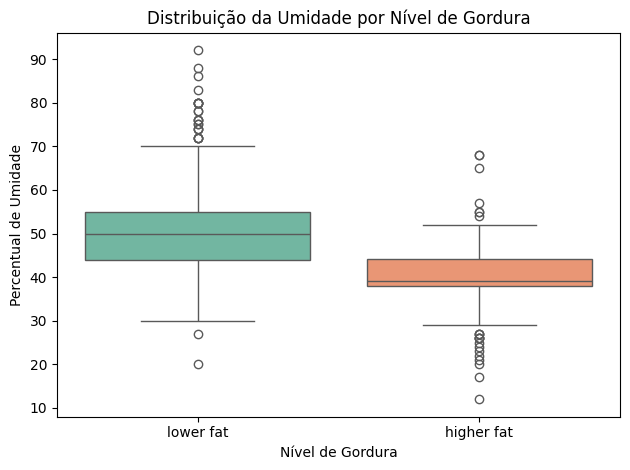

In [18]:
sns.boxplot(data=cheese, x='FatLevel', y='MoisturePercent',hue='FatLevel', palette='Set2')
plt.title('Distribuição da Umidade por Nível de Gordura')
plt.xlabel('Nível de Gordura')
plt.ylabel('Percentual de Umidade')
plt.tight_layout()
plt.show()

### In[10]: Outra visão no gráfico de violino.


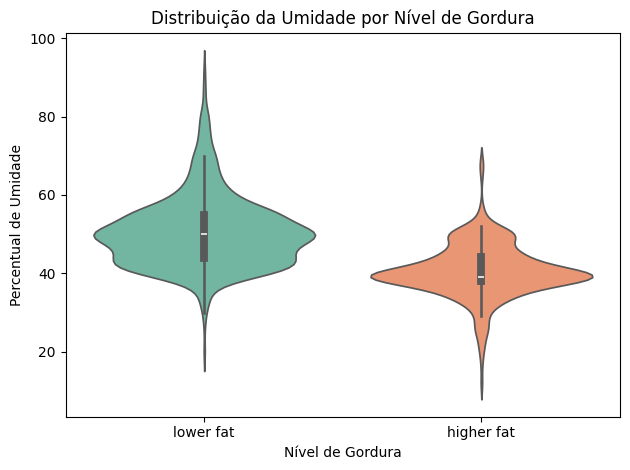

In [19]:
sns.violinplot(data=cheese, x='FatLevel', y='MoisturePercent', hue='FatLevel', palette='Set2')
plt.title('Distribuição da Umidade por Nível de Gordura')
plt.xlabel('Nível de Gordura')
plt.ylabel('Percentual de Umidade')
plt.tight_layout()
plt.show()

#### In[11]: Províncias com maior frequência no dataset


In [20]:
provincias  = cheese['ManufacturerProvCode'].value_counts()
provincias

,count
ManufacturerProvCode,
QC,796
ON,115
BC,65
NB,27
AB,13
MB,11
NS,10
NL,2
PE,2


### In[12]: Selecionando as 5 províncias com maior frequência no dataset


In [21]:
top5  = cheese['ManufacturerProvCode'].value_counts().head(5)
top5

,count
ManufacturerProvCode,
QC,796
ON,115
BC,65
NB,27
AB,13


### In[13]: Selecionando os códigos


In [22]:
top5_provincias  = cheese['ManufacturerProvCode'].value_counts().head(5).index
top5_provincias

Index(['QC', 'ON', 'BC', 'NB', 'AB'], dtype='object', name='ManufacturerProvCode')

### In[14]: Extrair as informações só dos codigos selecionados no dataset para criar um subset.

In [23]:
cheesefreq = cheese[cheese['ManufacturerProvCode'].isin(top5_provincias)]
cheesefreq

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2384,NB,Farmstead,50.0,Maple Hazelnut,Fresh goat ladle-molded,0,Soft Cheese,Goat,Pasteurized,NaN,Petit frais aux noix et sirop d'érable,lower fat
1035,2385,NB,Farmstead,50.0,pepper and garlic,Small aperitif cheese balls,0,Semi-soft Cheese,Goat,Pasteurized,NaN,Petits caprice,lower fat
1036,2386,NB,Farmstead,50.0,Unsweetened cranberry,Fresh goat ladle-molded,0,Fresh Cheese,Goat,Pasteurized,NaN,Petit frais aux canneberges,lower fat
1038,2388,AB,Industrial,46.0,Mild and Deep Flavor,Low in Sodium and Fat,0,Fresh Cheese,Cow,Pasteurized,NaN,FRESK-O,lower fat


### In[15]: Tabela cruzada mostra o tipo de queijo mais vendido por província.

- Para a província AB o tipo de queijo com maior produção é Firm Cheese;
- Para a província BC o tipo de queijo com maior produção é Firm Cheese;
- Para a província NB o tipo de queijo com maior produção é Soft Cheese;
- Para a província ON o tipo de queijo com maior produção é Semi-soft Cheese;
- Para a província QC  o tipo de queijo com maior produção é Firm Cheese.

In [32]:
tabela1 = pd.crosstab(
                      cheesefreq['CategoryTypeEn'],
                      cheesefreq['ManufacturerProvCode'])
tabela1

ManufacturerProvCode,AB,BC,NB,ON,QC
CategoryTypeEn,,,,,
Firm Cheese,5,28,3,27,274
Fresh Cheese,3,2,6,23,85
Hard Cheese,0,8,0,13,10
Semi-soft Cheese,2,7,7,28,176
Soft Cheese,0,15,10,16,224
Veined Cheeses,0,5,1,2,16


### In[16]: Resultado anterior em termos percentuais.

In [33]:
tabela1 = pd.crosstab(
                      cheesefreq['CategoryTypeEn'],
                      cheesefreq['ManufacturerProvCode'],
                      normalize='columns')
tabela2 = tabela1.round(4) * 100
tabela2

ManufacturerProvCode,AB,BC,NB,ON,QC
CategoryTypeEn,,,,,
Firm Cheese,50.0,43.08,11.11,24.77,34.90
Fresh Cheese,30.0,3.08,22.22,21.10,10.83
Hard Cheese,0.0,12.31,0.00,11.93,1.27
Semi-soft Cheese,20.0,10.77,25.93,25.69,22.42
Soft Cheese,0.0,23.08,37.04,14.68,28.54
Veined Cheeses,0.0,7.69,3.70,1.83,2.04


### In[17]: Tipo de queijo com maior percentual de produção por província.

In [34]:
tabela1 = pd.crosstab(
                      cheesefreq['CategoryTypeEn'],
                      cheesefreq['ManufacturerProvCode'],
                      normalize='index')
tabela2 = tabela1.round(4) * 100
tabela2


ManufacturerProvCode,AB,BC,NB,ON,QC
CategoryTypeEn,,,,,
Firm Cheese,1.48,8.31,0.89,8.01,81.31
Fresh Cheese,2.52,1.68,5.04,19.33,71.43
Hard Cheese,0.00,25.81,0.00,41.94,32.26
Semi-soft Cheese,0.91,3.18,3.18,12.73,80.00
Soft Cheese,0.00,5.66,3.77,6.04,84.53
Veined Cheeses,0.00,20.83,4.17,8.33,66.67


### In[18]: Representatividade de cada tipo de leite.

- Observa-se que o leite com maior frequência é o leite de vaca seguido dp de cabra.

In [27]:
# Frequência do tipo de leite.

Milk = cheese['MilkTypeEn'].value_counts()
Milk

,count
MilkTypeEn,
Cow,743
Goat,214
Ewe,62
Cow and Goat,13
Ewe and Cow,4
Ewe and Goat,2
Buffalo Cow,2
"Cow, Goat and Ewe",1


In [48]:
# Criando um novo subset considerando o leite de vaca e cabra.

Milk2 = cheese['MilkTypeEn'].value_counts().head(2).index
Milk2

Index(['Cow', 'Goat'], dtype='object', name='MilkTypeEn')

In [49]:
Milkfreq = cheese[cheese['MilkTypeEn'].isin(Milk2)]
Milkfreq

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat
5,350,NB,Industrial,48.0,NaN,Classic fresh cooking cheeses,0,Fresh Cheese,Cow,Pasteurized,NaN,Paneer (Northumberland Co-operative),lower fat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,2385,NB,Farmstead,50.0,pepper and garlic,Small aperitif cheese balls,0,Semi-soft Cheese,Goat,Pasteurized,NaN,Petits caprice,lower fat
1036,2386,NB,Farmstead,50.0,Unsweetened cranberry,Fresh goat ladle-molded,0,Fresh Cheese,Goat,Pasteurized,NaN,Petit frais aux canneberges,lower fat
1037,2387,NS,Farmstead,37.0,"Dill, Caraway, Chili Pepper, Cumin, Sage, Chiv...",Fresh curds through a variety of added Organic...,1,Hard Cheese,Cow,Pasteurized,NaN,Knoydart,higher fat
1038,2388,AB,Industrial,46.0,Mild and Deep Flavor,Low in Sodium and Fat,0,Fresh Cheese,Cow,Pasteurized,NaN,FRESK-O,lower fat


### In[18]: Tabela para verificar o nível de gordura do leite da vaca e da cabra.

- Observa-se que o leite da cabra tem um menor indice de gordura.

In [51]:
# Diferença entre leite vaca e cabra

freqMilk  = pd.crosstab(
                        Milkfreq['MilkTypeEn'],
                        Milkfreq['FatLevel'])
freqMilk

FatLevel,higher fat,lower fat
MilkTypeEn,,
Cow,297,446
Goat,29,185


In [52]:
freqleit_prop = pd.crosstab(
                            Milkfreq['MilkTypeEn'],
                            Milkfreq['FatLevel'],
                            normalize='index') * 100
freqleit_prop.round(2)

FatLevel,higher fat,lower fat
MilkTypeEn,,
Cow,39.97,60.03
Goat,13.55,86.45


In [53]:
# Resetando o índice para transformar em Dataframe

tabela_reset = freqleit_prop.reset_index()
tabela_reset.columns = ['MilkTypeEn', 'higher fat', 'lower fat']

In [54]:
# Renomenado as colunas

tabela_reset.columns.name = None # remove o nome do índice
tabela_reset.columns = ['MilkTypeEn', 'higher fat', 'lower fat']

In [55]:
tabela_melt = pd.melt(
    tabela_reset,
    id_vars='MilkTypeEn',
    value_vars=['lower fat', 'higher fat'],
    var_name='Fat Level',
    value_name='Percentual'
)
tabela_melt

,MilkTypeEn,Fat Level,Percentual
0,Cow,lower fat,60.026918
1,Goat,lower fat,86.448598
2,Cow,higher fat,39.973082
3,Goat,higher fat,13.551402


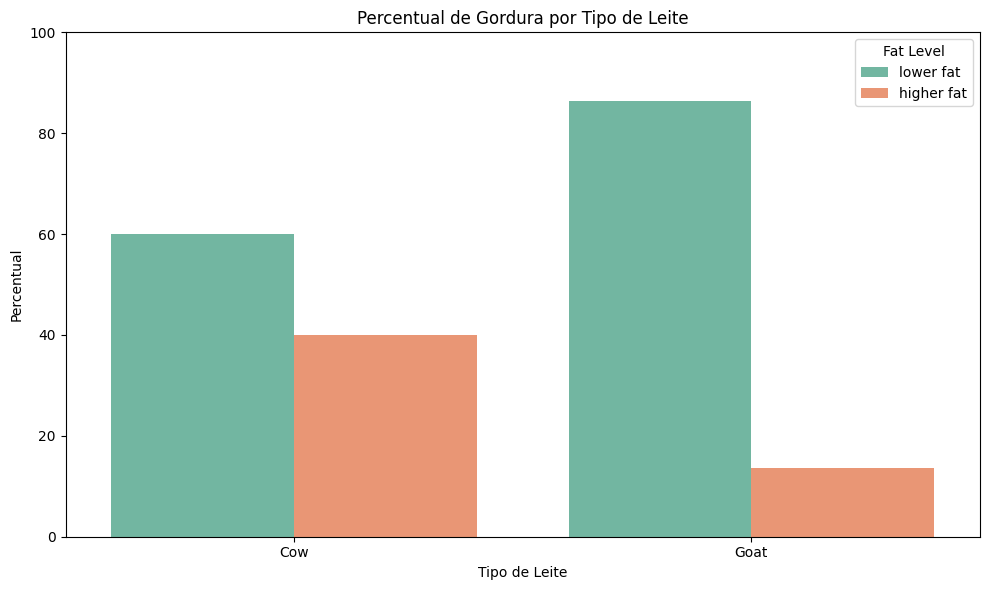

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tabela_melt, x='MilkTypeEn', y= 'Percentual', hue = 'Fat Level', palette = 'Set2')
plt.title('Percentual de Gordura por Tipo de Leite')
plt.xlabel('Tipo de Leite')
plt.ylabel('Percentual')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

### In[19]: Tabela para verificar o método de produção dos queijos.

- O meio de produção mais utilizado é o industrial.


In [58]:
ManufacturingTypeEn = cheese['ManufacturingTypeEn'].value_counts()
ManufacturingTypeEn

,count
ManufacturingTypeEn,
Industrial,455
Artisan,367
Farmstead,220


In [70]:
# Em termos percentuais

ManufacturingTypeEn_prop = (cheese['ManufacturingTypeEn'].value_counts(normalize=True) * 100).round(2)
ManufacturingTypeEn_prop

,proportion
ManufacturingTypeEn,
Industrial,43.67
Artisan,35.22
Farmstead,21.11


### In[20]: Produção e umidade média.

- Industria tem maior umidade na produção de queijos.

In [75]:
Manuf = cheese.groupby('ManufacturingTypeEn')['MoisturePercent'].mean().reset_index().round(2).sort_values('MoisturePercent', ascending=False)
Manuf

,ManufacturingTypeEn,MoisturePercent
2,Industrial,47.54
1,Farmstead,47.17
0,Artisan,46.43


### In[21]: Invetigando a relação entre o tipo de casca e a umidade.

- Queijos com o tipo de casca Bloomy Rind tem maior umidade

In [84]:
# Tipo de casca e umidade

tabela_org = cheese.groupby('RindTypeEn')['MoisturePercent'].mean().reset_index().round(2).sort_values('MoisturePercent', ascending=False)
tabela_org

,RindTypeEn,MoisturePercent
0,Bloomy Rind,51.30
2,No Rind,47.65
3,Washed Rind,45.54
1,Brushed Rind,43.20


/tmp/ipython-input-3220824402.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cheese, x='RindTypeEn', y='MoisturePercent', palette='Set2')


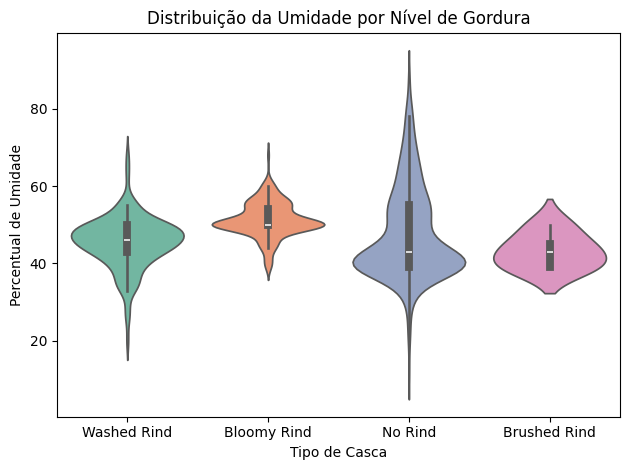

In [88]:
sns.violinplot(data=cheese, x='RindTypeEn', y='MoisturePercent', palette='Set2')
plt.title('Distribuição da Umidade por Nível de Gordura')
plt.xlabel('Tipo de Casca')
plt.ylabel('Percentual de Umidade')
plt.tight_layout()
plt.show()

### In[22]: Mapa de calor

In [101]:
heattabela = cheese.pivot_table(
                                index='FatLevel',
                                columns='CategoryTypeEn',
                                values='Organic',
                                aggfunc='mean'
) *100

In [102]:
heattabela

CategoryTypeEn,Firm Cheese,Fresh Cheese,Hard Cheese,Semi-soft Cheese,Soft Cheese,Veined Cheeses
FatLevel,,,,,,
higher fat,13.705584,0.000000,33.333333,12.962963,6.349206,20.000000
lower fat,7.894737,5.454545,21.428571,7.514451,6.862745,26.666667


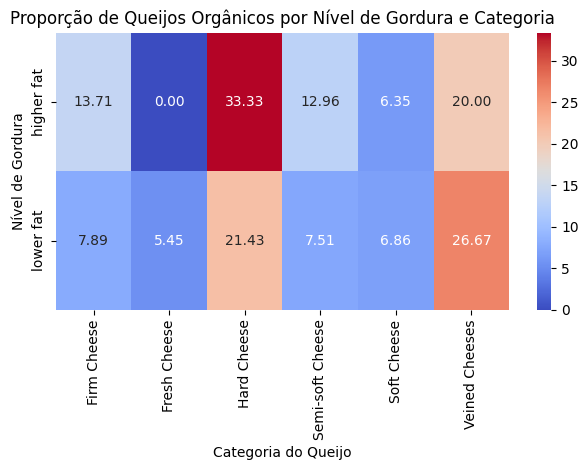

In [105]:
sns.heatmap(heattabela, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Proporção de Queijos Orgânicos por Nível de Gordura e Categoria')
plt.xlabel('Categoria do Queijo')
plt.ylabel('Nível de Gordura')
plt.tight_layout()
plt.show()